# 자연처리 프레임워크 및 라이브러리 설치하기

In [1]:
# colab에 Mecab설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [2]:
%cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [3]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
     |████████████████████████████████| 450kB 27.4MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-16 07:29:20--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=wIYnTGUo%2FzVvxn%2BdHS8w%2FawgoAs%3D&Expires=1626421685&AWSAccessKeyId=AKIA6KO

#  스팀 리뷰 데이터의 이해와 전처리

In [4]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 로드

In [5]:
# 데이터 다운 로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/steam.txt", filename="steam.txt")

('steam.txt', <http.client.HTTPMessage at 0x7f81db8b89d0>)

In [6]:
# 데이터 체크
total_data = pd.read_table('steam.txt', names=['label', 'document'],)
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 100000


In [7]:
# 훈련 데이터 내용 확인
total_data[:5]

,label,document
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요


In [8]:
# 중복 체크
total_data['document'].nunique(), total_data['label'].nunique()

(99892, 2)

In [9]:
# 중복 제거
total_data.drop_duplicates(subset=['document'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 99892


In [10]:
# NULL값 유무 체크
print(total_data.isnull().values.any())

False


# 훈련데이터와 테스트 데이터 분리하기

In [11]:
# 훈련데이터와 테스트 데이터 분리 3:1
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 74919
테스트용 리뷰의 개수 : 24973


# 레이블 분포 확인

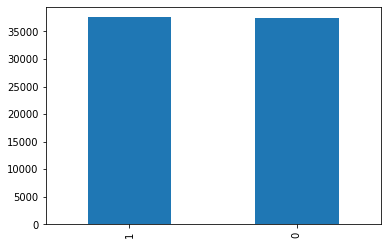

In [12]:
# 훈련 데이터에서의 레이블 값의 분포 확인
train_data['label'].value_counts().plot(kind = 'bar')

In [13]:
# 균일해보이지만 정확하게 몇개인지 확인해보자
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  37376
1      1  37543


# 데이터 정제하기

In [14]:
# 훈련데이터에 한글과 공백을 제외하고 모두 제거해보자
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,label,document
17152,1,게임 클리어 할 때까지 계속 새롭고 질리지 않습니다 정말 잘 만든 퍼즐 게임입니다 ...
59872,0,편 나름 재밌게 했으면 그걸로 멈추는게 좋았네
40613,0,할거 드럽게 없음
80196,0,ㅈ까라 이건 그거 하나만으로도 살 가치가 없는 겜 내가 저거 때문에 이 겜 시에 ...
35283,0,돈 아깝다


In [15]:
# 공백 데이터를 null값으로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

label       0
document    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [16]:
# test데이터에도 전처리 과정 진행
test_data.drop_duplicates(subset = ['document'], inplace=True) # 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 24973


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

# 토큰화

In [17]:
# 형태소 분석기 연습해보기 (KoNLPy의 Mecab)
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [18]:
# 불용어 정의 (한국어 조사, 접속사 등) = 29
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']

In [19]:
# 훈련데이터에 형태소 분석기를 사용하여 토큰화를 하면서 불용어 제거
train_data['tokenized'] = train_data['document'].copy().apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].copy().apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
train_data[:3]

,label,document,tokenized
17152,1,게임 클리어 할 때까지 계속 새롭고 질리지 않습니다 정말 잘 만든 퍼즐 게임입니다 ...,"[클리어, 할, 때, 까지, 계속, 새롭, 질리, 않, 습니다, 정말, 잘, 만든,..."
59872,0,편 나름 재밌게 했으면 그걸로 멈추는게 좋았네,"[편, 나름, 재밌, 했, 으면, 그걸로, 멈추, 좋, 았]"
40613,0,할거 드럽게 없음,"[할, 거, 드럽, 없]"


In [21]:
# 훈련데이터에 형태소 분석기를 사용하여 토큰화를 하면서 불용어 제거
test_data['tokenized'] = test_data['document'].copy().apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].copy().apply(lambda x: [item for item in x if item not in stopwords])

In [22]:
test_data[:5]

,label,document,tokenized
89965,0,인디 게임은 사고 나면 후회합니다 환불해야 하는데 놓쳤네 ㅡㅡ,"[인디, 사, 나, 후회, 합니다, 환불, 해야, 데, 놓쳤, ㅡㅡ]"
63982,0,퀵 인터페이스를 바꾸는 모션조차 하나도 없고 자원이라고는 손에 셀 정도인 이 겜에 ...,"[퀵, 인터페이스, 바꾸, 모션, 조차, 하나, 없, 자원, 라고, 손, 셀, 정도..."
97282,1,아기자기하고 재미있네요 ㅎㅎ,"[아기, 자기, 하고, 재미있, 네요, ㅎㅎ]"
19924,1,몇몇 필구 생각하고 적당히 즐기신다면 강추 가성비는 좀 애매하지만 뭔가 리겜하면서...,"[몇몇, 필, 구, 생각, 적당히, 즐기, 신다면, 강추, 가성, 비, 좀, 애매,..."
82792,0,아니 저장다해놓고 피방에서 겜하는대 싹다 삭제되어서는 이제 축제에서 깃발뻇기만하면 ...,"[아니, 저장, 해, 놓, 피, 방, 에서, 대, 싹, 삭제, 어서, 이제, 축제,..."


# 단어와 길이 분포 확인하기

In [23]:
# 각 긍/부정 별 단어 빈도 체크
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [24]:
# 부정 단어 빈도수 카운트
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('안', 8129), ('없', 7141), ('는데', 5786), ('있', 5692), ('같', 4247), ('로', 4083), ('할', 3920), ('거', 3902), ('나', 3805), ('해', 3653), ('너무', 3522), ('으로', 3351), ('기', 3348), ('했', 3265), ('어', 3143), ('보', 2987), ('습니다', 2962), ('것', 2935), ('지만', 2911), ('좋', 2899)]


In [25]:
# 긍정 단어 빈도수 카운트
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('있', 9987), ('좋', 6542), ('습니다', 5179), ('재밌', 4997), ('할', 4838), ('지만', 4809), ('해', 4354), ('없', 4145), ('보', 3907), ('으로', 3900), ('로', 3879), ('수', 3835), ('는데', 3825), ('기', 3592), ('안', 3368), ('것', 3362), ('같', 3356), ('네요', 3189), ('어', 3112), ('나', 3055)]


긍정 리뷰의 평균 길이 : 14.948459100231734
부정 리뷰의 평균 길이 : 15.284193065068493


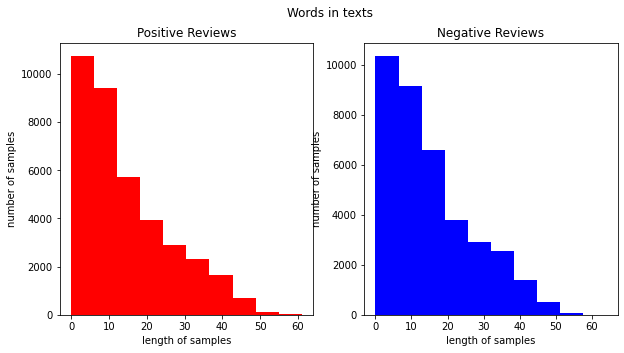

In [26]:
# 긍정, 부정 데이터별 길이 분포 체크
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [27]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

# 정수 인코딩

In [28]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 데이터를 정수로 변환
# 일단 단어 집합을 만들자
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [29]:
print(tokenizer.word_index)

{'있': 1, '안': 2, '없': 3, '는데': 4, '좋': 5, '할': 6, '습니다': 7, '해': 8, '로': 9, '지만': 10, '같': 11, '으로': 12, '기': 13, '보': 14, '나': 15, '거': 16, '재밌': 17, '것': 18, '했': 19, '어': 20, '수': 21, '네요': 22, '너무': 23, '아': 24, '않': 25, '적': 26, '플레이': 27, '좀': 28, '었': 29, '겠': 30, '시간': 31, '에서': 32, '사': 33, '때': 34, '주': 35, '함': 36, '입니다': 37, '재미': 38, '사람': 39, '아니': 40, '개': 41, '더': 42, '추천': 43, '내': 44, '서': 45, '잘': 46, '스토리': 47, '재미있': 48, '라': 49, '그냥': 50, '합니다': 51, '생각': 52, '왜': 53, '말': 54, '았': 55, '못': 56, '시': 57, '보다': 58, '해서': 59, '많': 60, '잼': 61, '으면': 62, '한글': 63, '갓': 64, '어서': 65, '싶': 66, '진짜': 67, '분': 68, '정말': 69, '그': 70, '모르': 71, '이거': 72, '돈': 73, '버그': 74, '만들': 75, '그래픽': 76, '던': 77, '번': 78, '세요': 79, '정도': 80, '면서': 81, '감': 82, '뭐': 83, '화': 84, '니': 85, '까지': 86, '원': 87, '중': 88, '다가': 89, '어요': 90, '긴': 91, '야': 92, '멀티': 93, '라고': 94, '친구': 95, '건': 96, '냐': 97, '데': 98, 'ㅋㅋㅋ': 99, '알': 100, '성': 101, '조작': 102, '느낌': 103, '인데': 104, '환불': 105, '처음

In [30]:
# word_index(vocab) 저장
word_index = tokenizer.word_index
import json
json = json.dumps(word_index, ensure_ascii=False)
vacab = open("RNN_BiLSTM_KoNLPy(Mecab)_steam_game_review_v0.1.json", "w", encoding="utf-8")
#json.dump(train_docs, make_file,, indent="\t")
vacab.write(json)
vacab.close()

In [31]:
# 등장 빈도수가 낮은 데이터를 처리해보자
# 2회 미만 단어는 비중이 몇인지 체크
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 32817
등장 빈도가 1번 이하인 희귀 단어의 수: 13878
단어 집합에서 희귀 단어의 비율: 42.28905750068562
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.2254607619437832


In [32]:
# 전체 단어 개수 중 빈도수 2미만인 단어는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 18941


In [33]:
# 단어집합을 케라스 토크나이저의 인자로 넘겨주면, 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# 빈 샘플(empty samples)제거

In [34]:
# 각 샘플의 길이가 0인 샘플들의 인덱스 확인
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [35]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

74889
74889


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 패딩

리뷰의 최대 길이 : 64
리뷰의 평균 길이 : 15.122007237377986


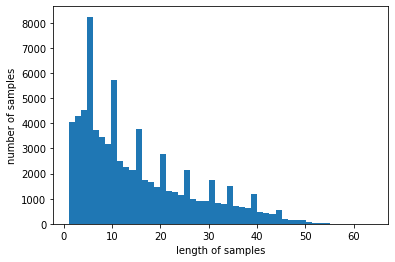

In [36]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰는 작업
# 전체 데이터에서 가장 길이가 긴 리뷰와, 전체의 길이분포를 알아보자
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [37]:
# 최적의 길이를 찾기 위해, 전체 샘플중 길이가 max_len 이하인 샘플의 비율을 확인하는 함수 생성
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [38]:
# 60 이하 비율 체크
max_len = 60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 99.99599407122541


In [39]:
# 99%가 60이하 이므로 모든 샘플길이를 60으로 결정
# 짧은 데이터는 0을 채우고, 60을 넘는 긴 데이터는 손실됨
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

# BiLSTM으로 네이버 영화 리뷰 감성 분류하기

In [40]:
# 필요한 프레임워크 및 라이브러리 임포트
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [41]:
# 임베딩 벡터의 차원은 100으로, 리뷰분류를 위해 LSTM 사용
# 왜 100인지는 모름
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))

In [42]:
# 검증 데이터 손실이 4회 증가하면 학습 조기 종료
# model check point를 사용하여 검증 데이터의 정확도가 이전보다 좋아질 경우만 모델 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('RNN_BiLSTM_KoNLPy(Mecab)_steam_game_review_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [43]:
# 에포크 15번 수행,  별도로 평가할 계획이므로 검증 안함
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
999/999 [==============================] - 171s 167ms/step - loss: 0.5000 - acc: 0.7584 - val_loss: 0.4624 - val_acc: 0.7836

Epoch 00001: val_acc improved from -inf to 0.78362, saving model to RNN_BiLSTM_KoNLPy(Mecab)_steam_game_review_v0.1.h5
Epoch 2/15
999/999 [==============================] - 173s 173ms/step - loss: 0.4334 - acc: 0.8031 - val_loss: 0.4500 - val_acc: 0.7906

Epoch 00002: val_acc improved from 0.78362 to 0.79063, saving model to RNN_BiLSTM_KoNLPy(Mecab)_steam_game_review_v0.1.h5
Epoch 3/15
999/999 [==============================] - 167s 167ms/step - loss: 0.4062 - acc: 0.8177 - val_loss: 0.4562 - val_acc: 0.7918

Epoch 00003: val_acc improved from 0.79063 to 0.79176, saving model to RNN_BiLSTM_KoNLPy(Mecab)_steam_game_review_v0.1.h5
Epoch 4/15
999/999 [==============================] - 162s 162ms/step - loss: 0.3833 - acc: 0.8307 - val_loss: 0.4423 - val_acc: 0.7974

Epoch 00004: val_acc improved from 0.79176 to 0.79737, saving model to RNN_BiLSTM_KoNLPy(

# 성능 평가
# acc로 훈련한 모델은 acc지표로만 측정 가능함

In [44]:
# 내부 테스트 데이터기반 성능 평가, evalute()[0] 손실률, [1] 정확도
loaded_model = load_model('RNN_BiLSTM_KoNLPy(Mecab)_steam_game_review_v0.1.h5')
result = loaded_model.evaluate(X_test, y_test, batch_size=60)
print("\n 테스트 결과:",result)

417/417 [==============================] - 17s 38ms/step - loss: 0.4472 - acc: 0.7933

 테스트 결과: [0.4472421705722809, 0.793336808681488]


In [45]:
# 별도 평가 데이터셋 로드
cosmetic_data = pd.read_table('cosmetic_review_data.txt')
app_data = pd.read_table('mobile_app_review_data.txt')

In [46]:
# 별도 평가 데이터셋 토크나이징
X_test_cosmetic = []
for sentence in cosmetic_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test_cosmetic.append(temp_X)
    
X_test_app = []
for sentence in app_data['document']:
    temp_X = mecab.morphs(sentence)  # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test_app.append(temp_X)

In [47]:
# 워드 벡터화
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_test_cosmetic)
tokenizer.fit_on_texts(X_test_app)
X_test_cosmetic = tokenizer.texts_to_sequences(X_test_cosmetic)
X_test_app = tokenizer.texts_to_sequences(X_test_app)

In [48]:
# 패딩
X_test_cosmetic = pad_sequences(X_test_cosmetic, maxlen = max_len)
X_test_app = pad_sequences(X_test_app, maxlen = max_len)

In [49]:
# 라벨데이터 포함
y_test_cosmetic = np.array(cosmetic_data['label'])
y_test_app = np.array(app_data['label'])

In [50]:
# 별도 평가 데이터기반 성능 평가 cosmetic
loaded_model = load_model('RNN_BiLSTM_KoNLPy(Mecab)_steam_game_review_v0.1.h5')
result = loaded_model.evaluate(X_test_cosmetic, y_test_cosmetic, batch_size=60)
print("\n 테스트 결과:",result)

167/167 [==============================] - 7s 37ms/step - loss: 1.0230 - acc: 0.4444

 테스트 결과: [1.0230419635772705, 0.44440001249313354]


In [51]:
# 별도 평가 데이터기반 성능 평가 app
loaded_model = load_model('RNN_BiLSTM_KoNLPy(Mecab)_steam_game_review_v0.1.h5')
result = loaded_model.evaluate(X_test_app, y_test_app, batch_size=60)
print("\n 테스트 결과:",result)

16/16 [==============================] - 1s 36ms/step - loss: 0.9249 - acc: 0.4941

 테스트 결과: [0.924914538860321, 0.49406689405441284]


# 리뷰 예측하기

In [52]:
# 학습한 모델에 새로운 예측값을 얻는 것은 model.predict() 사용
# 그리고 예측할 때에도 동일한 전처리 수행해야함.
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [53]:
sentiment_predict('노잼 ..완전 재미 없음 ㅉㅉ') #ok

76.66% 확률로 부정 리뷰입니다.


In [54]:
sentiment_predict('조금 어렵지만 재밌음ㅋㅋ') #ok

51.68% 확률로 긍정 리뷰입니다.


In [55]:
sentiment_predict('케릭터가 예뻐서 좋아요') #ok

85.52% 확률로 부정 리뷰입니다.


# 쇼핑 리뷰에 적용시

In [56]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박') #ok

84.16% 확률로 부정 리뷰입니다.


In [57]:
sentiment_predict('진짜 배송도 늦고 개짜증나네요. 뭐 이런 걸 상품이라고 만듬?') #ok

93.72% 확률로 부정 리뷰입니다.


In [58]:
sentiment_predict('판매자님... 너무 짱이에요.. 대박나삼')#ok

71.44% 확률로 긍정 리뷰입니다.


In [59]:
sentiment_predict('ㅁㄴㅇㄻㄴㅇㄻㄴㅇ리뷰쓰기도 귀찮아') #ok

52.36% 확률로 긍정 리뷰입니다.


# 영화 리뷰를 예측해보면?

In [60]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ') #ok

52.84% 확률로 부정 리뷰입니다.


In [61]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ') #ok

85.70% 확률로 긍정 리뷰입니다.


In [62]:
sentiment_predict('이딴게 영화냐 ㅉㅉ') #ok

71.06% 확률로 부정 리뷰입니다.


In [63]:
sentiment_predict('감독 뭐하는 놈이냐?') #ok

68.73% 확률로 긍정 리뷰입니다.


In [64]:
sentiment_predict('대박 감독 뭐하시는 분?') #ok

85.85% 확률로 긍정 리뷰입니다.


In [65]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다') #ok

91.05% 확률로 긍정 리뷰입니다.
